<h2>Project Explore Weather trends</h2>

<h4>Extract data from database</h4>
Looking through the table <i>city_list</i> to find the city nearest to 
the city of Cologne where I live.:<br/>
 <span style="color:blue">
SELECT * FROM city_list
WHERE country = 'Germany';
    </span>
<br/>
I decided to extract the temperature data without any filtering, since
I wanted to do all necessary data wrangling completely with pandas within a jupyter notebook.<br/>
So, I went with:<br/><br/>
 <span style="color:blue">
SELECT * FROM city_data;</span> for city tempearatures.<br/>
<span style="color:blue">
    SELECT * FROM global_data;</span> for global temperatures.<br/>
I saved the data to the files:
<ul>
    <li>city_data.csv</li>
    <li>global_data.csv</li>
</ul>
I started a jupyter notebook for further processing of the data:

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
#importing the extracted data
df_cities = pd.read_csv('data/city_data.csv')
df_global = pd.read_csv('data/global_data.csv')

<h4>Data wrangling</h4>
For visualization and analyzing purposes I found it convenient having both data lists (global and cities) in one aligned data frame. To prepare the concatenation of the lists I added columns 'city' and 'country' to <i>df_global</i>:


In [30]:
df_global['city'] = 'global'
df_global['country'] = 'World'

Then I concatenated both data frames to <i>df_all</i>:

In [31]:
df_all = pd.concat([df_global, df_cities], sort=True)

Now the filtering: the next two python lines get rid of all cities except Hamburg and the global data. Also, we want to analyze the records from 1750 to 2013 because these are the years, we have data for both global and Hamburg.

In [32]:
df_all = df_all[df_all['city'].isin(['global', 'Hamburg']) & ((df_all['year']>=1750) & (df_all['year'] <=2013))]
df_all.dropna(how='all', inplace=True)

Not a necessary step, but I decided to work with a Multiindex ('city', 'year') frome here on. So:

In [33]:
df_all.set_index(['city', 'year'], inplace=True)

<h4>Visualization</h4>
I used the library matplotlib for visualization. The x-axis of the line chart reflects the years corresponding to level 2 of the data frame's MultiIndex:

In [47]:
x = df_all.index.get_level_values(1).unique()

I found it clearest to present the data of global and Hamburg on the same axes, in order to illustrate the similarities and discrepancies in the best possible way.
<h5>Moving Average</h5>
The code for calculating the moving average of the temperature data is incorporated into the code for plotting the data. The pandas library comes with a rolling()-function which is used to calculate the moving average with a window of size 4. The calculated values are then plotted on the y-axis of the line chart.<br/>
Code for calculating the moving average:<br/>
<span style="color:blue"/>
df_all.loc[city,'avg_temp'].rolling(4).mean()
</span>

Text(0.5, 1.0, 'Weather data for Hamburg and the world')

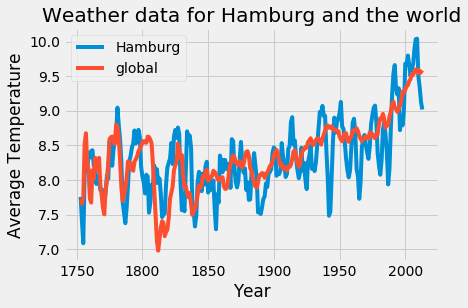

In [48]:
fig, ax_lst = plt.subplots(1,1)
for city in ['Hamburg', 'global']:
    #plotting the calculated moving average on the y-axis
    ax_lst.plot(x, df_all.loc[city,'avg_temp'].rolling(4).mean(), label=city)
ax_lst.legend()
ax_lst.set_xlabel('Year')
ax_lst.set_ylabel('Average Temperature')
ax_lst.set_title("Weather data for Hamburg and the world")



<h4>Observations</h4>
<ul>
    <li>the chart is clearly showing a common trend: temperatures are rising from the 1750s to the present and both data represent that fact</li>
    <li>both chart lines are approximately the same level (i.e. temperature) which isn't that much of a surprise given the fact that Hamburg is located in middle latitudes in a temperate climate zone and the global data in a way takes averages of temperature records around the world</li>
    <li>the Hamburg data seems to be much more erratic and volatile than the global data which appears to be much smoother because of it is based on averaging calculations of global records.</li>
    <li>while in general strikingly following the trace of the global line, there are a few occasions with dramatic deviations from the red path: in the 1940s for example there is a visible rise of global temperatures. Hamburg, however, is showing a seemingly dramatic drop temperaturewise in the same period of time.
    </ul>